In [ ]:
#Import the data

from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import csv

# Define the file path

path_raw_recipes = '/content/drive/My Drive/Master_Thesis/Food.com_RAW_recipes.csv'
path_raw_interactions = '/content/drive/My Drive/Master_Thesis/Food.com_RAW_interactions.csv'


# Create an empty list to store the recipe data
data_recipes = []

# Open and read the file line-by-line
with open(path_raw_recipes, newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
      data_recipes.append(row)

# Create the DataFrame with specified column names
df_recipes = pd.DataFrame(data_recipes, columns=["name", "recipe_id", "minutes", "contributor_id", "submitted", "tags", "nutrition", "n_steps", "steps", "description", "ingredients", "n_ingredients"])
df_recipes = df_recipes.drop(0).reset_index(drop=True)


# Display a sample of the dataset to check the structure
print(df_recipes.head())


# Create an empty list to store the interaction data
data_interactions = []

# Open and read the file line-by-line
with open(path_raw_interactions, newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
      data_interactions.append(row)

# Create the DataFrame with specified column names
df_interactions = pd.DataFrame(data_interactions, columns=["user_id", "recipe_id", "date", "rating", "review"])
df_interactions = df_interactions.drop(0).reset_index(drop=True)


# Display a sample of the dataset to check the structure
print(df_interactions.head())


                                         name recipe_id minutes  \
0  arriba   baked winter squash mexican style    137739      55   
1            a bit different  breakfast pizza     31490      30   
2                   all in the kitchen  chili    112140     130   
3                          alouette  potatoes     59389      45   
4          amish  tomato ketchup  for canning     44061     190   

  contributor_id   submitted  \
0          47892  2005-09-16   
1          26278  2002-06-17   
2         196586  2005-02-25   
3          68585  2003-04-14   
4          41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition n_steps  \
0       [5

In [ ]:
import pandas as pd

df_merge = pd.merge(df_recipes, df_interactions, on="recipe_id")
df_merge.drop_duplicates(subset=['steps', 'description'], inplace=True)
df_merge.reset_index(drop=True, inplace=True)
df = df_merge[["ingredients", "steps", "rating"]]
print(df)

                                              ingredients  \
0       ['winter squash', 'mexican seasoning', 'mixed ...   
1       ['prepared pizza crust', 'sausage patty', 'egg...   
2       ['ground beef', 'yellow onions', 'diced tomato...   
3       ['spreadable cheese with garlic and herbs', 'n...   
4       ['tomato juice', 'apple cider vinegar', 'sugar...   
...                                                   ...   
231595  ['celery', 'onion', 'green sweet pepper', 'gar...   
231596  ['paprika', 'salt', 'garlic powder', 'onion po...   
231597  ['hard-cooked eggs', 'mayonnaise', 'dijon must...   
231598  ['butter', 'eagle brand condensed milk', 'ligh...   
231599  ['granulated sugar', 'shortening', 'eggs', 'fl...   

                                                    steps rating  
0       ['make a choice and proceed with recipe', 'dep...      5  
1       ['preheat oven to 425 degrees f', 'press dough...      0  
2       ['brown ground beef in large pot', 'add choppe...      4  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 2.7443 - mae: 1.3460 - val_loss: 0.5618 - val_mae: 0.5120 - learning_rate: 1.0000e-05
Epoch 2/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.8201 - mae: 1.0593 - val_loss: 0.3542 - val_mae: 0.2926 - learning_rate: 1.0000e-05
Epoch 3/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.6236 - mae: 0.9455 - val_loss: 0.4001 - val_mae: 0.3846 - learning_rate: 1.0000e-05
Epoch 4/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.4673 - mae: 0.8938 - val_loss: 0.3957 - val_mae: 0.3842 - learning_rate: 1.0000e-05
Epoch 5/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1.3557 - mae: 0.8541 - val_loss: 0.3384 - val_mae: 0.3190 - learning_rate: 1.0000e-05
Epoch 6/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 1.3005 - mae: 0.8231 - val_loss: 0.3358 - val_mae: 0.3161 - learning_rate: 1.0000e-05
Epoch 7/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 1.2099 - mae: 0.7930 - val_loss: 0.3992 - val

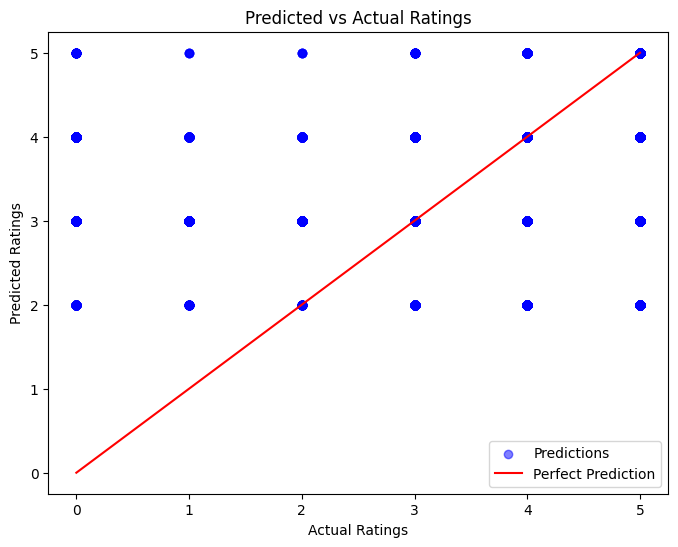

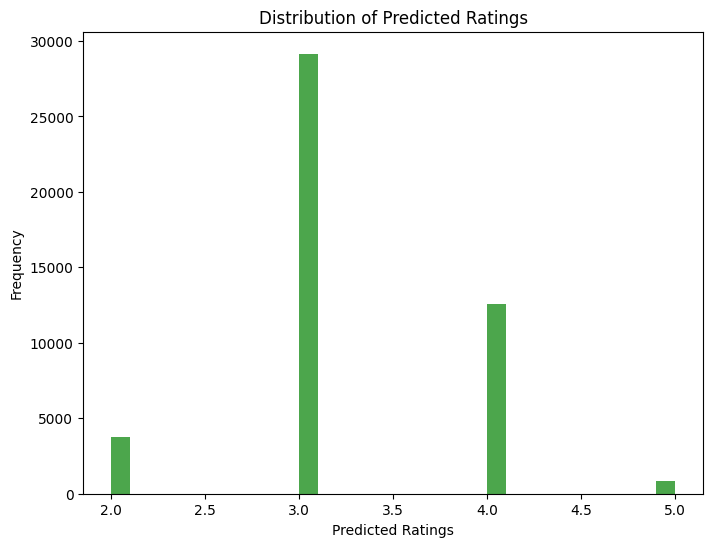

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Add, Activation, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_sample_weight
from tensorflow.keras.losses import MeanSquaredError

np.random.seed(123)

# Load data
ratings = pd.to_numeric(df['rating'], errors='coerce').dropna()
stella_embeddings = np.load('/content/drive/My Drive/Master_Thesis/stella_embeddings.npy')

# Scale ratings between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
ratings_scaled = scaler.fit_transform(ratings.values.reshape(-1, 1)).flatten()

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    stella_embeddings, ratings_scaled, test_size=0.2, random_state=42
)

# Residual Block with L2 Regularization
def residual_block(x, units, l2_reg=1e-4):
    shortcut = x
    x = Dense(units, activation=None, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation instead of ReLU
    x = BatchNormalization()(x)
    x = Dense(units, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = Add()([x, shortcut])
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation here as well
    return x

# Build the Neural Network Model
def build_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(512, activation=None, kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation
    x = residual_block(x, 512)
    x = Dropout(0.5)(x)
    x = Dense(256, activation=None, kernel_regularizer=regularizers.l2(1e-4))(x)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(1, activation='linear')(x)
    model = Model(inputs, outputs)
    return model

# Train and Evaluate Model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    optimizer = Adam(learning_rate=1e-5)  # Lower learning rate
    model.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Compute sample weights for imbalanced classes
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # Modify the loss function to use weighted loss
    model.compile(optimizer=optimizer, loss=MeanSquaredError(), metrics=['mae'])
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=64,
        sample_weight=sample_weights,  # Include sample weights during training
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")

    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"RMSE: {rmse:.4f}")

    return model, y_pred

# Build, Train, and Save the Model
model = build_model(X_train.shape[1])
model, y_pred = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)

# Rescale predictions back to original rating scale (0-5)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_pred_integers = np.round(y_pred_rescaled).clip(0, 5).astype(int)

y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()


# Print the first 10 predicted ratings
print("First 10 predicted ratings (after inverse scaling):")
print(y_pred_integers[:10].flatten())

# Save the model
model.save('/content/drive/My Drive/Master_Thesis/stella_january.keras')
print("Model saved successfully!")

# Plot results
import matplotlib.pyplot as plt

# Plot 1: Scatter Plot (Predicted vs Actual Ratings)
plt.figure(figsize=(8, 6))
plt.scatter(y_val_rescaled, y_pred_integers, alpha=0.5, color='blue', label='Predictions')
plt.plot([0, 5], [0, 5], color='red', label='Perfect Prediction')  # Perfect prediction line
plt.title('Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

# Plot 2: Histogram of Predicted Ratings
plt.figure(figsize=(8, 6))
plt.hist(y_pred_integers, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.show()




In [ ]:
import numpy as np
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModel

# Load Stella model
stella_model = AutoModel.from_pretrained(
    'dunzhang/stella_en_1.5B_v5',
    device_map="auto",          # Automatically distribute model across available devices
)

tokenizer = AutoTokenizer.from_pretrained('dunzhang/stella_en_1.5B_v5')

def format_input(ingredients, steps):
    return f"<ingredients> {ingredients} </ingredients>, <steps> {steps} </steps>"

def generate_stella_embeddings_batch(texts, tokenizer, model, max_len=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = tokenizer(
        texts,
        return_tensors="pt",
        max_length=max_len,
        truncation=True,
        padding="max_length"
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding

    return cls_embeddings.cpu().numpy()  # Move embeddings to CPU for saving

# Parameters
batch_size = 32
save_interval = 1000
save_path = '/content/drive/My Drive/Master_Thesis/stella_embeddings2.npy'

# Format dataset
steps_and_ingredients = [
    format_input(ingredients, steps)
    for ingredients, steps in zip(df['ingredients'], df['steps'])
]

# Try to load existing embeddings
try:
    existing_embeddings = np.load(save_path)
    completed_instances = existing_embeddings.shape[0]
    print(f"Loaded {completed_instances} completed embeddings from {save_path}.")
except FileNotFoundError:
    existing_embeddings = np.empty((0, 128))  # Adjust if necessary for your embedding size
    completed_instances = 0
    print("No existing embeddings found. Starting from scratch.")

# Resume from the last completed instance
stella_embeddings = []
for i in tqdm(range(completed_instances, len(steps_and_ingredients), batch_size)):
    batch_texts = steps_and_ingredients[i:i+batch_size]
    batch_embeddings = generate_stella_embeddings_batch(batch_texts, tokenizer, stella_model)
    stella_embeddings.append(batch_embeddings)

    # Save embeddings periodically
    if (i // batch_size + 1) % (save_interval // batch_size) == 0:
        # Append to existing embeddings
        np.save(save_path, np.vstack([existing_embeddings, *stella_embeddings]))
        print(f"Partial embeddings saved at {save_path}")
        stella_embeddings = []  # Clear the list to free up memory

# Final save of embeddings after the loop
if stella_embeddings:  # If there are any remaining embeddings
    np.save(save_path, np.vstack([existing_embeddings, *stella_embeddings]))
print(f"Final embeddings saved successfully to {save_path}")

Model creation

In [ ]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.59.6
    Uninstalling openai-1.59.6:
      Successfully uninstalled openai-1.59.6


In [ ]:
import openai
# Set up your API key
openai.api_key = 'API key'  # Replace with your actual API key

def generate_gpt4_response(prompt):
    try:
        # Use ChatCompletion for chat-based models like gpt-4-turbo
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=100,       # Adjust as needed
            temperature=0.7       # Adjust as needed
        )
        # Return the content of the response
        return response['choices'][0]['message']['content']
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
user_prompt = "Explain the difference between supervised and unsupervised learning."
response = generate_gpt4_response(user_prompt)
print("GPT-4 Response:", response)

GPT-4 Response: Supervised and unsupervised learning are two primary types of machine learning that differ in their approaches, goals, and the nature of the data used.

### Supervised Learning

1. **Definition**: In supervised learning, the algorithm is trained on a labeled dataset, which means that each training example is paired with an output label or target value.

2. **Goal**: The goal is to learn a mapping from inputs to outputs, enabling the model to make predictions or classifications based on new,


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils.class_weight import compute_sample_weight
from sentence_transformers import SentenceTransformer
from concurrent.futures import ThreadPoolExecutor, as_completed
import torch
from transformers import AutoTokenizer, AutoModel
import openai

# Load Stella model
stella_embedder = AutoModel.from_pretrained(
    'dunzhang/stella_en_1.5B_v5',
    device_map="auto",  # Automatically distribute model across available devices
)
tokenizer = AutoTokenizer.from_pretrained('dunzhang/stella_en_1.5B_v5')

# Load trained model for rating predictions
stella_model = load_model('/content/drive/My Drive/Master_Thesis/stella_january.keras', compile=False)

# Load scaler (assumes pre-fitted scaler is saved)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([0, 5]).reshape(-1, 1))  # Example scaler fitting (adjust based on data)

# Helper function to format input for recipes
def format_input(ingredients, steps):
    return f"<ingredients> {ingredients} </ingredients>, <steps> {steps} </steps>"

# Generate STELLA embeddings for a batch of texts
def generate_stella_embeddings_batch(texts, tokenizer, model, max_len=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = tokenizer(
        texts,
        return_tensors="pt",
        max_length=max_len,
        truncation=True,
        padding="max_length"
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding

    return cls_embeddings.cpu().numpy()

# Batch prediction for ratings
def batch_predict_ratings(recipes, model, scaler, tokenizer, embedder):
    """Batch predict ratings for a list of recipes."""
    embeddings = generate_stella_embeddings_batch(recipes, tokenizer, embedder)
    predictions = model.predict(embeddings)
    y_pred_rescaled = scaler.inverse_transform(y_pred).flatten()
    y_pred_integers = np.round(y_pred_rescaled).clip(0, 5).astype(int)
    return y_pred_integers

# Generate recipe based on heuristics
def generate_recipe_with_heuristics(base_recipe, base_score, heuristics):
    """Generate a single recipe with targeted improvements."""
    prompt = f"""You are a world-class culinary innovator. Create a single, refined, and innovative recipe
    that scores higher than {base_score}. Avoid sub-dishes like side salads or multiple sauces. Instead,
    craft a single cohesive dish with bold, unique flavors and modern cooking techniques. Base recipe: {base_recipe}.
    Use these principles: {heuristics}. Aim for a score of at least 4.8."""

    try:
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=512,
            temperature=0.8
        )
        return response['choices'][0]['message']['content'].strip()
    except Exception as e:
        print(f"Error generating recipe: {e}")
        return None

# Parallel recipe generation
def generate_recipes_in_parallel(base_recipe, base_score, recipes_per_iteration, heuristics):
    """Generate multiple recipes in parallel."""
    with ThreadPoolExecutor() as executor:
        futures = [
            executor.submit(generate_recipe_with_heuristics, base_recipe, base_score, heuristics)
            for _ in range(recipes_per_iteration)
        ]
        return [future.result() for future in as_completed(futures) if future.result()]

# FUN Search optimization algorithm
def fun_search_optimization_with_heuristics(base_recipe, base_score, stella_model, tokenizer, embedder, scaler, max_iterations=10, recipes_per_iteration=10):
    """Optimize recipes using the FUN Search algorithm."""
    best_recipe, best_score = None, -np.inf
    recipe_pool = []

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")

        # Generate recipes
        generated_recipes = generate_recipes_in_parallel(base_recipe, base_score, recipes_per_iteration, [])

        # Generate embeddings and predict scores
        embeddings = generate_stella_embeddings_batch(generated_recipes, tokenizer, embedder)
        scores = stella_model.predict(embeddings)
        scores = scaler.inverse_transform(scores).flatten()
        scores = np.round(scores).clip(0, 5).astype(int)
        # Update recipe pool and track best recipe
        for recipe, score in zip(generated_recipes, scores):
            recipe_pool.append({'recipe': recipe, 'score': score})
            if score > best_score:
                best_score = score
                best_recipe = {'recipe': recipe, 'score': score}

        # Focus on top performers
        recipe_pool = sorted(recipe_pool, key=lambda x: x['score'], reverse=True)[:20]
        print(f"Top score in iteration {iteration + 1}: {best_score:.4f}")

        # Update base recipe and score for next iteration
        if best_recipe:
            base_recipe = best_recipe['recipe']
            base_score = best_recipe['score']

    return best_recipe

# Initialize the process
stella_embeddings = np.load('/content/drive/My Drive/Master_Thesis/stella_embeddings.npy')
base_recipe = stella_embeddings[2]
base_score = 3  # Example initial score

best_recipe = fun_search_optimization_with_heuristics(
    base_recipe, base_score, stella_model, tokenizer, stella_embedder, scaler,
    max_iterations=10, recipes_per_iteration=10
)

print(f"Best Recipe: {best_recipe['recipe']}")
print(f"Predicted Rating: {best_recipe['score']}")

Iteration 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Top score in iteration 1: 5.0000
Iteration 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Top score in iteration 2: 5.0000
Iteration 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Top score in iteration 3: 5.0000
Iteration 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Top score in iteration 4: 5.0000
Iteration 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Top score in iteration 5: 5.0000
Iteration 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Top score in iteration 6: 5.0000
Iteration 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Top score in iteration 7: 5.0000
Iteration 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Top score in iteration 8: 5.0000
Iteration 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Top score in iteration 9: 5.0000
Iteration 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Top score in iteration 10: 5.0000
Best Recipe: ### Smoked Miso Glazed Eggplant with Quinoa-Black Garlic Purée and Crispy Shallots

**Servings:** 2  
**Preparation Time:** 